# Predicting Used Car Prices  
## This notebook carries out the statistical analysis and assumption testing for the linear regression model, parts 3 and 4.
Load in R libraries

In [1]:
library("car")
library("caret")
library("gvlma")
library("predictmeans")
library("e1071")
library("readr")
library("ggplot2")
library("reticulate")
library("lmtest")
library("corrplot")
library("olsrr")
library("tidyverse")
library("sandwich")

Loading required package: carData

Loading required package: ggplot2

Loading required package: lattice

Loading required package: lme4

Loading required package: Matrix

Loading required package: nlme


Attaching package: 'nlme'


The following object is masked from 'package:lme4':

    lmList


Loading required package: lmeInfo

Loading required package: parallel

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


corrplot 0.92 loaded


Attaching package: 'olsrr'


The following object is masked from 'package:datasets':

    rivers


── Attaching packages ─────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ purrr   0.3.4     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::colla

In [2]:
library(sandwich)


Load in Python libraries (used for visualizations)

In [3]:
# Load Python libraries
sns <- import('seaborn')
plt <- import('matplotlib.pyplot')
pd <- import('pandas')

In [4]:
# Import data
cleaned_data <- read_csv("Cleaned_Data.csv")
quant_data1 <- read_csv("quant_data1.csv")
dummied_data <- read_csv("dummied_data.csv")

New names:
• `` -> `...1`
Rows: 1841 Columns: 8
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (3): Brand, Body, EngineType
dbl (5): ...1, Mileage, EngineV, Year, PriceLog

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 2990 Columns: 5
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (5): ...1, PriceLog, Mileage, EngineV, Year

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 1841 Columns: 21
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (3)

# 3. Stepwise Regression via Backward Elimination
As mentioned in the Python notebook, we need to determine whether to remove any variables that could impare the model. A stepwise regression test will take a look at our model's predicted performance using all the variables in the dataframe. Then, the test will eliminate one variable at a time, assess the model again, and determine whether the model will benefit from keeping the variable or improve by eliminating it. The test will repeat this process for each variable. This is called backward elimination. 

Our first step, then, is building the linear model. We will use 'PriceLog' as our response variable, and the rest of the columns as predictor variables. By the end of this test, we will know which predictors to keep and which to discard.

### Build the preliminary model

In [5]:
# Create a function called FitAll that creates a linear model of all our predictors:
model = lm(PriceLog~.,data = dummied_data)

Here's the summary for that model:

In [6]:
summary(model)


Call:
lm(formula = PriceLog ~ ., data = dummied_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.77836 -0.14068  0.00698  0.15728  0.98228 

Coefficients: (13 not defined because of singularities)
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -1.513e+02  3.638e+00 -41.602  < 2e-16 ***
...1               -1.354e-06  4.993e-06  -0.271  0.78628    
Mileage            -4.505e-04  1.081e-04  -4.168 3.22e-05 ***
EngineV             2.640e-01  1.327e-02  19.901  < 2e-16 ***
Year                8.007e-02  1.803e-03  44.407  < 2e-16 ***
BrandBMW           -3.339e-03  3.163e-02  -0.106  0.91593    
BrandMercedes-Benz -7.619e-02  2.843e-02  -2.680  0.00742 ** 
BrandMitsubishi    -4.198e-01  3.488e-02 -12.035  < 2e-16 ***
BrandRenault       -5.524e-01  3.092e-02 -17.867  < 2e-16 ***
BrandToyota        -1.219e-01  3.282e-02  -3.714  0.00021 ***
BrandVolkswagen    -2.125e-01  2.845e-02  -7.471 1.23e-13 ***
Bodyhatch          -3.137e-01  3.876e-02

-----------------------------------------------------------------------------------------------------------
Above, if a variable has at least two asterisks, then it is a significant predictor of 'PriceLog'. From what we can tell, it looks like we have lots of great predictors and two not so great -- the BMW category from 'Brand' and the 'Other' category from 'EngineType'. Our overall accuracy sits at about 79%. This is a good first start. Our next step is finding out what combination of predictors yields the most accurate predictions.


### Perform the backward elimination

In [7]:
# Perform stepwise regression with the linear model, using backward elimination.
step(model, direction = 'backward')

Start:  AIC=-4845.75
PriceLog ~ ...1 + Mileage + EngineV + Year + Brand + Body + EngineType + 
    Audi + BMW + `Mercedes-Benz` + Mitsubishi + Renault + Toyota + 
    crossover + hatch + other + vagon + van + Gas + Other


Step:  AIC=-4845.75
PriceLog ~ ...1 + Mileage + EngineV + Year + Brand + Body + EngineType + 
    Audi + BMW + `Mercedes-Benz` + Mitsubishi + Renault + Toyota + 
    crossover + hatch + other + vagon + van + Gas


Step:  AIC=-4845.75
PriceLog ~ ...1 + Mileage + EngineV + Year + Brand + Body + EngineType + 
    Audi + BMW + `Mercedes-Benz` + Mitsubishi + Renault + Toyota + 
    crossover + hatch + other + vagon + van


Step:  AIC=-4845.75
PriceLog ~ ...1 + Mileage + EngineV + Year + Brand + Body + EngineType + 
    Audi + BMW + `Mercedes-Benz` + Mitsubishi + Renault + Toyota + 
    crossover + hatch + other + vagon


Step:  AIC=-4845.75
PriceLog ~ ...1 + Mileage + EngineV + Year + Brand + Body + EngineType + 
    Audi + BMW + `Mercedes-Benz` + Mitsubishi + Renault + T


Call:
lm(formula = PriceLog ~ Mileage + EngineV + Year + Brand + Body + 
    EngineType, data = dummied_data)

Coefficients:
       (Intercept)             Mileage             EngineV                Year  
        -1.514e+02          -4.504e-04           2.640e-01           8.008e-02  
          BrandBMW  BrandMercedes-Benz     BrandMitsubishi        BrandRenault  
        -3.674e-03          -7.639e-02          -4.199e-01          -5.526e-01  
       BrandToyota     BrandVolkswagen           Bodyhatch           Bodyother  
        -1.220e-01          -2.127e-01          -3.139e-01          -3.093e-01  
         Bodysedan           Bodyvagon             Bodyvan       EngineTypeGas  
        -2.410e-01          -2.720e-01          -4.218e-01          -1.369e-01  
   EngineTypeOther  
        -7.424e-02  


#### It looks like we'll keep all our variables. Having performed our elimination, our next step will be defining the recommended model. (It didn't really change.)

In [8]:
# Define the final linear model
model1 = lm(PriceLog ~ Mileage + EngineV + Year + Brand + Body + EngineType, data = dummied_data)
# Get its sumary
summary(model1)


Call:
lm(formula = PriceLog ~ Mileage + EngineV + Year + Brand + Body + 
    EngineType, data = dummied_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.78065 -0.13985  0.00766  0.15825  0.98184 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -1.514e+02  3.636e+00 -41.623  < 2e-16 ***
Mileage            -4.504e-04  1.081e-04  -4.168 3.21e-05 ***
EngineV             2.640e-01  1.326e-02  19.905  < 2e-16 ***
Year                8.008e-02  1.803e-03  44.426  < 2e-16 ***
BrandBMW           -3.674e-03  3.160e-02  -0.116 0.907438    
BrandMercedes-Benz -7.639e-02  2.841e-02  -2.689 0.007233 ** 
BrandMitsubishi    -4.199e-01  3.487e-02 -12.040  < 2e-16 ***
BrandRenault       -5.526e-01  3.090e-02 -17.884  < 2e-16 ***
BrandToyota        -1.220e-01  3.281e-02  -3.719 0.000206 ***
BrandVolkswagen    -2.127e-01  2.843e-02  -7.482 1.13e-13 ***
Bodyhatch          -3.139e-01  3.874e-02  -8.102 9.77e-16 ***
Bodyother          -3.093e

-------------------------------------------------------------------------------------------
This is the same output we obtained when we made the model initially.

##### Key Takeaways  
- We will drop 'BMW' from the model.
-  We can rely on this model to make accurate price estimates 79% of the time. 
- (The other 19% can be chalked up to fluctuations and random error.)
----------------------------------------------------------------------------------------------

In [9]:
dummied_data1 <- subset(dummied_data, select = c('Mileage','EngineV','Year','PriceLog','Brand','Body','EngineType','Audi','Mercedes-Benz','Mitsubishi','Renault','Toyota','crossover','hatch','other','vagon','van','Gas'))
model2 <- lm(PriceLog ~ Mileage + EngineV + Year + Brand + Body + EngineType, data = dummied_data1)
summary(model2)


Call:
lm(formula = PriceLog ~ Mileage + EngineV + Year + Brand + Body + 
    EngineType, data = dummied_data1)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.78065 -0.13985  0.00766  0.15825  0.98184 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -1.514e+02  3.636e+00 -41.623  < 2e-16 ***
Mileage            -4.504e-04  1.081e-04  -4.168 3.21e-05 ***
EngineV             2.640e-01  1.326e-02  19.905  < 2e-16 ***
Year                8.008e-02  1.803e-03  44.426  < 2e-16 ***
BrandBMW           -3.674e-03  3.160e-02  -0.116 0.907438    
BrandMercedes-Benz -7.639e-02  2.841e-02  -2.689 0.007233 ** 
BrandMitsubishi    -4.199e-01  3.487e-02 -12.040  < 2e-16 ***
BrandRenault       -5.526e-01  3.090e-02 -17.884  < 2e-16 ***
BrandToyota        -1.220e-01  3.281e-02  -3.719 0.000206 ***
BrandVolkswagen    -2.127e-01  2.843e-02  -7.482 1.13e-13 ***
Bodyhatch          -3.139e-01  3.874e-02  -8.102 9.77e-16 ***
Bodyother          -3.093

# 4. Assumptions for Linear Regression
We'll need to ensure that our model meets the following criteria before we start training and testing its performance:
1.	Linearity
    - The rate of change in price corresponds to the rates of change for everything else. (They form a straight line on a graph.)
2. Normality - The range of values for each variable is more or less centered around the average value, with the majority falling in the middle and fewer at the sides; each variable forms a symmetric bell curve.
3.	Each variable has about the same random fluctations as the others. (Equal variance in the error terms.)
    - Greater error in one will have a heavier weight on the model and will bias results.
4.	Everything was measured without error
5.	All our variables (except Price) are independent of each other
6.	No outliers
    - Their presence can skew our model's predictions.

### 1. Linearity

We'll plot the data against each other to get a visual for their relationships and their distributions. We want to see straight groupings within the intersections of 'PriceLog' and the 'Mileage', 'EngineV', and 'Year' columns. Focus on the upper right diagonal of the grid (the lower left is a mirror).

- Intersection of Price and Year
    - Notice an upward trend from bottom left to top right
    - More recent model years are associated with higher price values. So the newer the car, the more expensive it is.
- Intersection of Mileage and Year
    - Notice a downward trend from top left to bottom right.
    - The more recent the model year, generally the lower the mileage. So, older cars tend to have higher mileages.
- Intersection of Price and Mileage
    - Notice another downward trend from top left to bottom right.
    - As mileages increase, prices decrease. So, as a car's mileage racks up, its value goes down. 
- Intersection of Price and EngineV
    - Notice a 

sns$pairplot(r_to_py(cleaned_data), hue = 'Body')
plt$suptitle('')
#display the plot
plt$show()

   
##### Linearity

There's a linear relationship between PriceLog and Year, and between PriceLog and Mileage. (Notice the dots group in a thick, diagonal line.)

### 2. Normality

Referring again to the grid above: Each of the histograms (running diagonally across the center) forms a rough bell curve, so all our variables are more or less normally distributed. 

### 3. Random fluctuations are the same throughout

The model must be able to explain all fluctuations in our response variable. If it can't, then that would mean the model is unstable. We need to make sure that all fluctuations are accounted for.

Look at the figures below and focus on the two charts on the left-hand side. For each, we'd like to see the points having about the same distance to the red line on either side, which they do. This indicates that erroRs in the model vary more or less the same across the board among the independent variables. Moreover, if the points form an obvious cone shape, then we'll know that the error terms deviate somehow. Luckily, all we have are amorphous blobs. (These plots refer to the residuals of our model.)


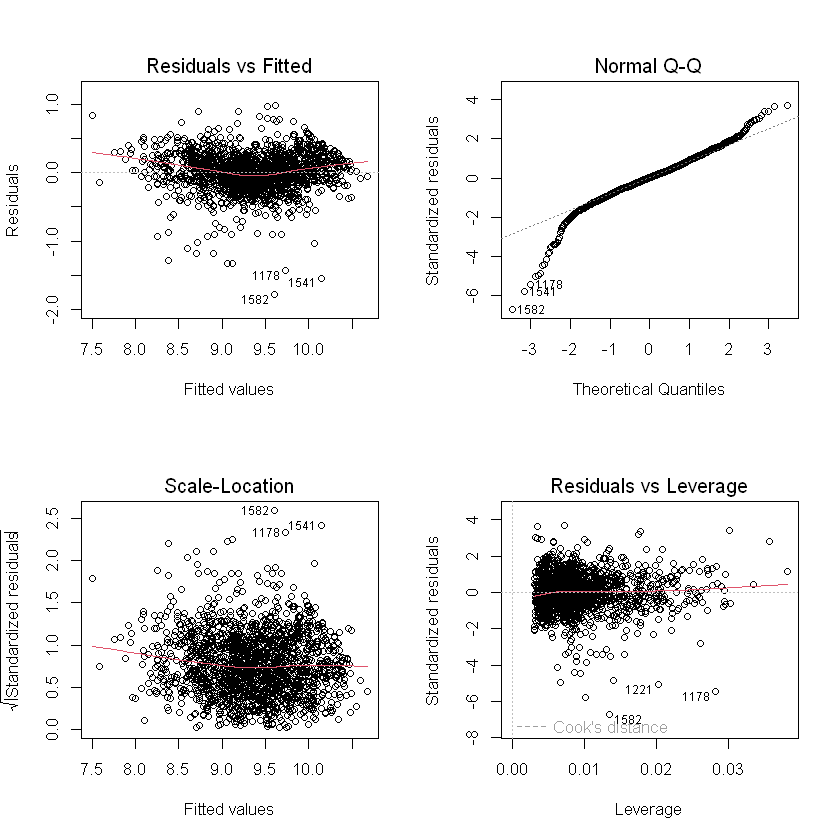

In [10]:
par(mfrow=c(2,2))
plot(model2)

### 4. None of the predictors influence each other (too much).
This one may be tricky. It requires that all our predictor variables are independent of each other, such that they each make their own unique, mark on the predictions. Since we're looking at cars, we know that mileage and year often go hand in hand--older cars tend to have higher mileages. Let's take a look at the relationships between our variables to see if we can find any significant relationships. 

We will use three different methods to examine the model for multicolliniarity.

##### Method 1. Correlations
We can refer to a correlation matrix to see some the relationships:

In [11]:
corr_plot_data = quant_data1

In [12]:
corrplot_data <- subset(quant_data1, select = -c(1))

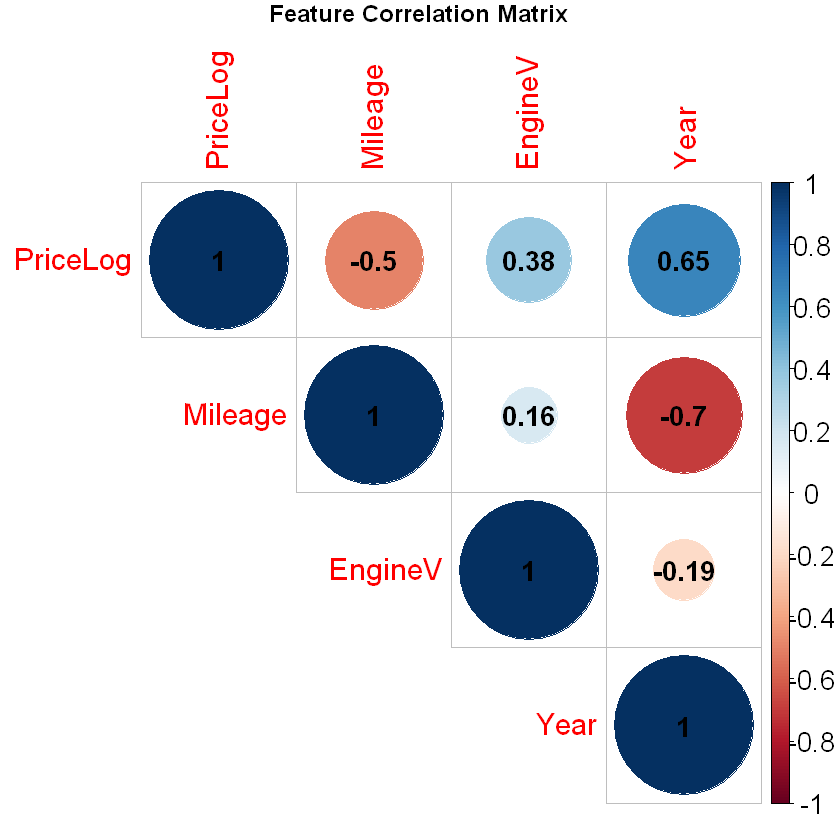

In [13]:
title <- 'Feature Correlation Matrix'
corrplot(cor(corrplot_data), addCoef.col = 1,number.cex = 1.33, tl.cex = 1.5,type = "upper", tl.pos = 'td',cl.cex = 1.33, title = title, mar=c(0,0,1,0), )

The above two plots provide the same information. On the left, that information is represented in circles with varying shades of color; the bigger and darker the circle, the higher the correlation. On the right, the same information is presented as numeric values ranging from -1 to 1; the closer to 1 (or -1) from 0, the higher the correlation. If we look at the intersection of Mileage and Year, we'll find a big, red circle indicating a strong relationship between them. The accompanying value for this relationship is 0.7, which is the highest on the graph. (Values of 1.00 indicate a variable's relationship with itself, which we ignore).

The next highest correlation exists between PriceLog (i.e., Price) and Year, at 0.65.

As a general rule, these relationships become an issue at 0.9 or higher and even then, their presence will not affect our predictions (just the coefficient of each predictor). Since our goal lies in building an accurate predictive model, this issue (called multicollinearity) probably won't be pose a problem. But to be safe, we will run additional tests on our regression model to determine its presence and decide whether it's something to address. 

The above plots are useful for conducting a visual seach for dependent relationships among the variables. Since we have many variables to worry about (all the different manufacturers, engine types, and body types), it is easier to run a couple of tests for a straightforward breakdown, rather than squint at a complex graph. 

##### Method 2. Variance Inflation Factor
The Variance Inflation Factor (VIF) measures the inflation in the coefficient of the predictor variable due to the collinearities among the other predictors. A VIF of 1 means that the regression coefficient is not inflated by the presence of the other predictors, meaning no multicollinearity present.

As a rule of thumb, a VIF of 5 or more indicates multicollinearity. Ideally, they are below 3.

## Variance Inflation Factor

In [14]:
# Calculate VIF values for each predictor variable.
vif(model1)

,GVIF,Df,GVIF^(1/(2*Df))
Mileage,2.108220,1,1.451971
EngineV,2.071881,1,1.439403
Year,2.139162,1,1.462587
Brand,3.332642,6,1.105518
Body,2.934527,5,1.113663
EngineType,1.738715,2,1.148305


Looking under "GVIF", the three highest scores correspond to our categorical variables 'Brand', 'Body', and 'Engine Type' and indicate the presence of high intercorrelations. However, this is something to be expected for these predictors. The categories within a variable will naturally have high multicollinearity with each other--the proportion of one category will necessarily affect the proportions of the others. So, even though we found multicollinarity, in this instance we can safely ignore its presence and be secure in the knowledge that our model is unaffected.

Looking under the Condition Number column, the only values higher than 10 are the bottom two rows. However, none of the corresponding variance values are greater than 0.5. So, this test confirms the findings from the first two.

#### Conclusion
There is NO multicollinearity present in the model.

### 5. Screen for Outliers

Lastly, we'll make one more search for outliers and remove any that we find.
We'll narrow our focus by axis, starting with the x space and then moving to the y space. 

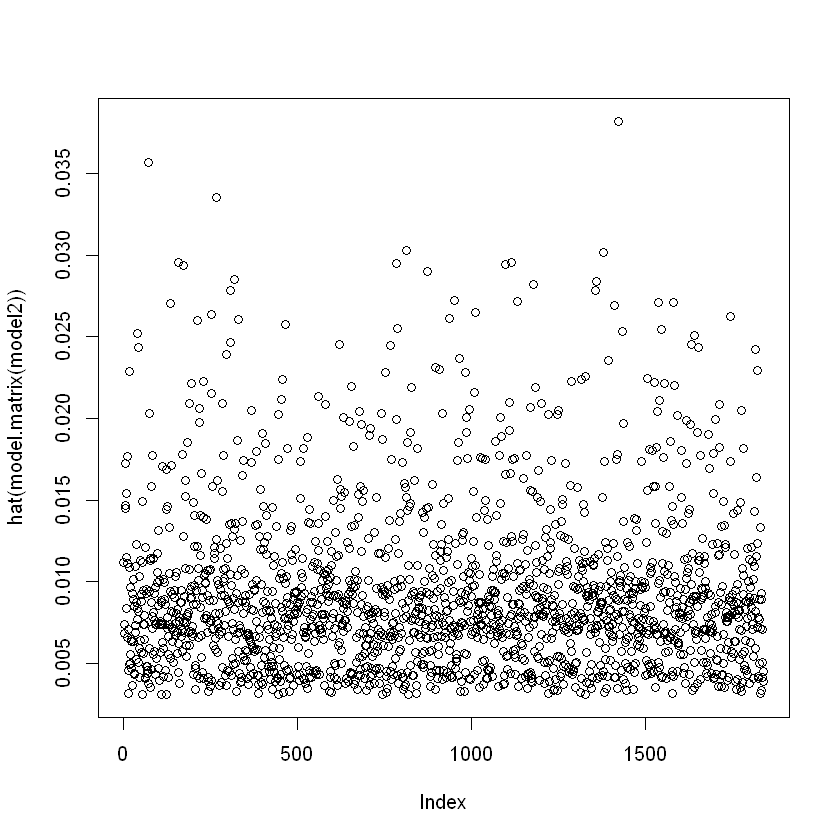

In [15]:
# screen leverage (extreme values) in the x space
plot(hat(model.matrix(model2)))

An extreme value in the x space will have a leverage value greater than 0.2. The highest value in the graph above is less than 0.04, so we're more than clear of outliers in the x space.

Next we'll screen for outliers in the y space with a test. Any value below 0.01 (under the 'Bonferroni p' column) constitutes an outlier and should be removed. 

In [16]:
# Test in y space
car::outlierTest(model2)

      rstudent unadjusted p-value Bonferroni p
1582 -6.802004         1.3942e-11   2.5668e-08
1541 -5.852505         5.7286e-09   1.0546e-05
1178 -5.484883         4.7158e-08   8.6818e-05
1221 -5.086515         4.0221e-07   7.4046e-04
601  -5.008428         6.0179e-07   1.1079e-03
230  -4.899412         1.0463e-06   1.9262e-03
427  -4.478875         7.9690e-06   1.4671e-02
210  -4.452619         8.9969e-06   1.6563e-02

Looks like we have outliers here, since the highest value is 2.7989e-03. So, we'll drop all the rows listed and redefine the regression model that we had built earlier with the new and improved dataset.

In [17]:
dummied_data2 <- dummied_data1 %>% filter(!row_number() %in% c(1582,1541,1178,1221,601,230,427,210))
# redefine our regression model with the improved dataset
final <- lm(PriceLog ~ Mileage + EngineV + Year + Body + Brand + EngineType, data = dummied_data2)
# Get the summary
summary(final)


Call:
lm(formula = PriceLog ~ Mileage + EngineV + Year + Body + Brand + 
    EngineType, data = dummied_data2)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.10894 -0.14628  0.00098  0.15351  0.97676 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -1.477e+02  3.442e+00 -42.915  < 2e-16 ***
Mileage            -5.290e-04  1.024e-04  -5.164 2.68e-07 ***
EngineV             2.639e-01  1.249e-02  21.134  < 2e-16 ***
Year                7.828e-02  1.706e-03  45.876  < 2e-16 ***
Bodyhatch          -3.083e-01  3.656e-02  -8.433  < 2e-16 ***
Bodyother          -3.136e-01  2.567e-02 -12.219  < 2e-16 ***
Bodysedan          -2.416e-01  2.084e-02 -11.589  < 2e-16 ***
Bodyvagon          -2.743e-01  2.631e-02 -10.423  < 2e-16 ***
Bodyvan            -4.325e-01  2.306e-02 -18.756  < 2e-16 ***
BrandBMW            4.225e-03  2.970e-02   0.142 0.886897    
BrandMercedes-Benz -6.460e-02  2.671e-02  -2.418 0.015693 *  
BrandMitsubishi    -3.911

-------------------------------------------------------------------------------------
The dataset now meets the criteria for training and testing. We'll go back to our Python notebook to finalize the model's construction.

In [18]:
# Create a new CSV file with the updated dataset
write.csv(dummied_data2,"dummied_data2.csv", row.names = FALSE)